In [3]:
import pandas as pd
import numpy as np
import random

def initialize_centroids(data, k):
    """ Initialize k centroids randomly """
    indices = random.sample(range(len(data)), k)
    centroids = data[indices, :]
    return centroids

def assign_clusters(data, centroids):
    """ Assign each data point to the nearest centroid """
    clusters = []
    for point in data:
        distances = np.sqrt(((point - centroids) ** 2).sum(axis=1))
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return clusters

def compute_centroids(data, clusters, k):
    """ Compute the new centroids """
    new_centroids = []
    for i in range(k):
        points = data[np.where(clusters == i)]
        centroid = points.mean(axis=0)
        new_centroids.append(centroid)
    return np.array(new_centroids)

def k_means(data, k, max_iters=1000):
    """ The K-means algorithm """
    data = np.array(data) 
    centroids = initialize_centroids(data, k)
    for i in range(max_iters):
        old_centroids = centroids.copy()
        clusters = assign_clusters(data, centroids)
        centroids = compute_centroids(data, np.array(clusters), k)
        if np.allclose(centroids, old_centroids):
            break
    return np.array(clusters), centroids




In [4]:
# Load the file
df = pd.read_pickle('data/pkl_vector_10k_reviews.pkl')

# Extract only the feature vectors
features = df.vector.to_list()

In [5]:
actual_labels = df.good_rating

In [7]:
# Apply K-means
k = 2  # number of clusters
clusters, centroids = k_means(features, k)


In [44]:
comparison = pd.DataFrame({'Actual Label': actual_labels, 'Cluster': clusters})

misclassified = comparison[comparison['Actual Label'] != comparison['Cluster']]
print((len(df) - len(misclassified)) / len(df))


    Actual Label  Cluster
1              1        0
2              1        0
9              1        0
10             1        0
11             1        0
0.5642


In [45]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Extract only the feature vectors
array_features = np.array(features)
array_labels = np.array(actual_labels)

silhouette_avg = silhouette_score(array_features, array_labels)
sample_silhouette_values = silhouette_samples(array_features, array_labels)

In [46]:
print(silhouette_avg)
print(sample_silhouette_values)

0.05847046242104021
[0.07188645 0.06470027 0.06196227 ... 0.05032201 0.05075456 0.05009708]


In [12]:
from sklearn.metrics import silhouette_score

# Extract only the feature vectors
array_features = np.array(features)
array_labels = np.array(actual_labels)

silhouette_avg = 0
accuracy_iter = 0
num_trials = 20
accuracy_list = []

for test_iter in range(num_trials): 
    # Apply K-means
    k = 2  # number of clusters
    clusters, centroids = k_means(features, k)
 
    comparison = pd.DataFrame({'Actual Label': actual_labels, 'Cluster': clusters})

    misclassified = comparison[comparison['Actual Label'] != comparison['Cluster']]
    
    accuracy_iter += ((len(df) - len(misclassified)) / len(df))
    
    silhouette_avg += silhouette_score(array_features, array_labels)
    accuracy_list.append(accuracy_iter)

# Make predictions and evaluate
print(f"Avg Accuracy: {accuracy_iter/num_trials}")
print("\nAvg Silhouette Score:\n", {silhouette_avg/num_trials})

Avg Accuracy: 0.51475

Avg Silhouette Score:
 {0.058470462421040224}


In [15]:
accuracy_per_iter = []
for i,num in enumerate(accuracy_list, 1):
    accuracy_per_iter.append(num/i)

accuracy_per_iter

[0.5642,
 0.5,
 0.47856666666666664,
 0.505725,
 0.51738,
 0.5251833333333333,
 0.5307428571428572,
 0.5349250000000001,
 0.5381777777777779,
 0.52565,
 0.5292272727272728,
 0.5337416666666667,
 0.5262076923076924,
 0.5305642857142858,
 0.5226466666666668,
 0.5267750000000001,
 0.5214235294117648,
 0.5165055555555557,
 0.5121473684210528,
 0.51475]

/Users/elizabethjohnson/opt/anaconda3/envs/p-recs10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/elizabethjohnson/opt/anaconda3/envs/p-recs10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


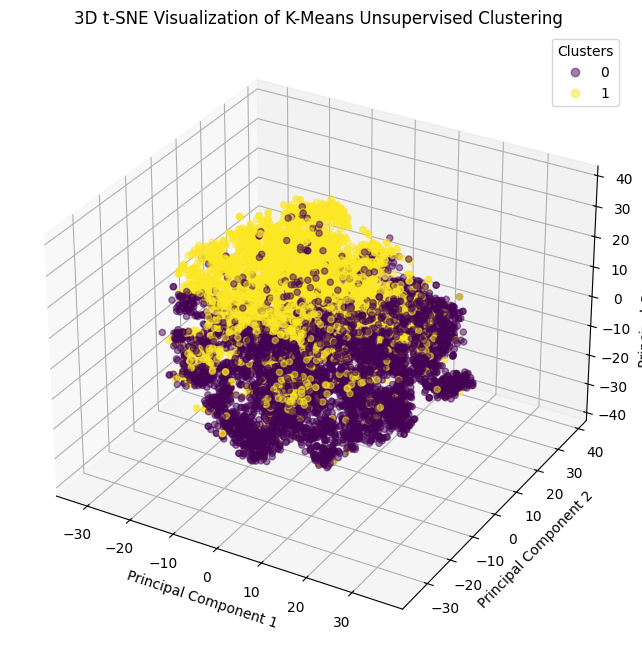

In [9]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

# Extract only the feature vectors
array_features = np.array(features)
array_labels = np.array(clusters)

# Apply t-SNE
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(array_features)

# Create a scatter plot of the t-SNE representation with color-coded clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=array_labels, cmap='viridis', alpha=0.5)

# Add legend
ax.set_title('3D t-SNE Visualization of K-Means Unsupervised Clustering')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend(*scatter.legend_elements(), title='Clusters')


plt.show()

In [12]:
import plotly.express as px

fig = px.scatter_3d(x=X_tsne[:, 0], y=X_tsne[:, 1], z=X_tsne[:, 2], color=clusters)
fig.update_layout(title='3D Visualization of Unsupervised K-Means Clustering')
fig.show()